<a href="https://colab.research.google.com/github/tusharsharm/R-Practice/blob/main/Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tushar Sharma

#  Introduction
In this file, we will analyze the Auto-MPG dataset to predict miles per gallon (mpg) based on various vehicle characteristics such as cylinders, displacement, horsepower, weight, acceleration, model_year.

# We will:

* Load and preprocess the dataset (handle missing data, etc.)
* Fit a Multiple Linear Regression model
* Interpret the model coefficients in detail
* Evaluate the model using RMSE and compare predicted vs. actual MPG

# installing and importing libraries

In [3]:
install.packages('dplyr')
install.packages('dplyr')
install.packages('caret')
install.packages('ggplot2')
install.packages('corrplot')
install.packages('knitr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Load required packages
library(dplyr)
library(caret)
library(ggplot2)
library(corrplot)
library(knitr)

Loading required package: ggplot2

Loading required package: lattice

corrplot 0.95 loaded



# Data Loading And Preprocessing

In [8]:
auto_mpg <- read.csv('/content/auto-mpg.csv',  sep = ",",
  header = FALSE,
  na.strings = "?")

In [9]:
print(auto_mpg)

      V1        V2           V3         V4     V5           V6         V7
1    mpg cylinders displacement horsepower weight acceleration model-year
2     18         8          307        130   3504           12         70
3     15         8          350        165   3693         11.5         70
4     18         8          318        150   3436           11         70
5     16         8          304        150   3433           12         70
6     17         8          302        140   3449         10.5         70
7     15         8          429        198   4341           10         70
8     14         8          454        220   4354            9         70
9     14         8          440        215   4312          8.5         70
10    14         8          455        225   4425           10         70
11    15         8          390        190   3850          8.5         70
12    15         8          383        170   3563           10         70
13    14         8          340       

# Assign column names based on the dataset

In [11]:
colnames(auto_mpg) <- c("mpg","cylinders","displacement","horsepower","weight","acceleration","model_year")

### Convert  to numeric

In [19]:
auto_mpg$mpg <- as.numeric(auto_mpg$mpg)
auto_mpg$cylinders <- as.numeric(auto_mpg$cylinders)
auto_mpg$displacement <- as.numeric(auto_mpg$displacement)
auto_mpg$horsepower <- as.numeric(auto_mpg$horsepower)
auto_mpg$weight <- as.numeric(auto_mpg$weight)
auto_mpg$acceleration <- as.numeric(auto_mpg$acceleration)
auto_mpg$model_year <- as.numeric(auto_mpg$model_year)



 * We removed rows with missing values to keep the dataset clean.

In [20]:
#remove rows with missing values
auto_mpg <- na.omit(auto_mpg)

### quick look at the data

In [21]:
head(auto_mpg)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,18,8,307,130,3504,12.0,70
3,15,8,350,165,3693,11.5,70
4,18,8,318,150,3436,11.0,70
5,16,8,304,150,3433,12.0,70
6,17,8,302,140,3449,10.5,70
7,15,8,429,198,4341,10.0,70


In [22]:
summary(auto_mpg)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.38   1st Qu.:4.000   1st Qu.:104.8   1st Qu.: 75.0   1st Qu.:2225  
 Median :23.00   Median :4.000   Median :148.5   Median : 92.0   Median :2804  
 Mean   :23.52   Mean   :5.457   Mean   :193.7   Mean   :104.2   Mean   :2973  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:263.2   3rd Qu.:125.0   3rd Qu.:3610  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration     model_year   
 Min.   : 8.00   Min.   :70.00  
 1st Qu.:13.80   1st Qu.:73.00  
 Median :15.50   Median :76.00  
 Mean   :15.56   Mean   :76.03  
 3rd Qu.:17.12   3rd Qu.:79.00  
 Max.   :24.80   Max.   :82.00  

# Exploratory Data Analysis

In [23]:
#check correlations among numeric predictors

cor_data <- cor(auto_mpg[,c("mpg","cylinders","displacement","horsepower","weight","acceleration","model_year")])

### From the correlation plot, we can observe:
mpg tends to have a negative correlation with weight, horsepower, and displacement.
mpg tends to have a positive correlation with model_year and acceleration.

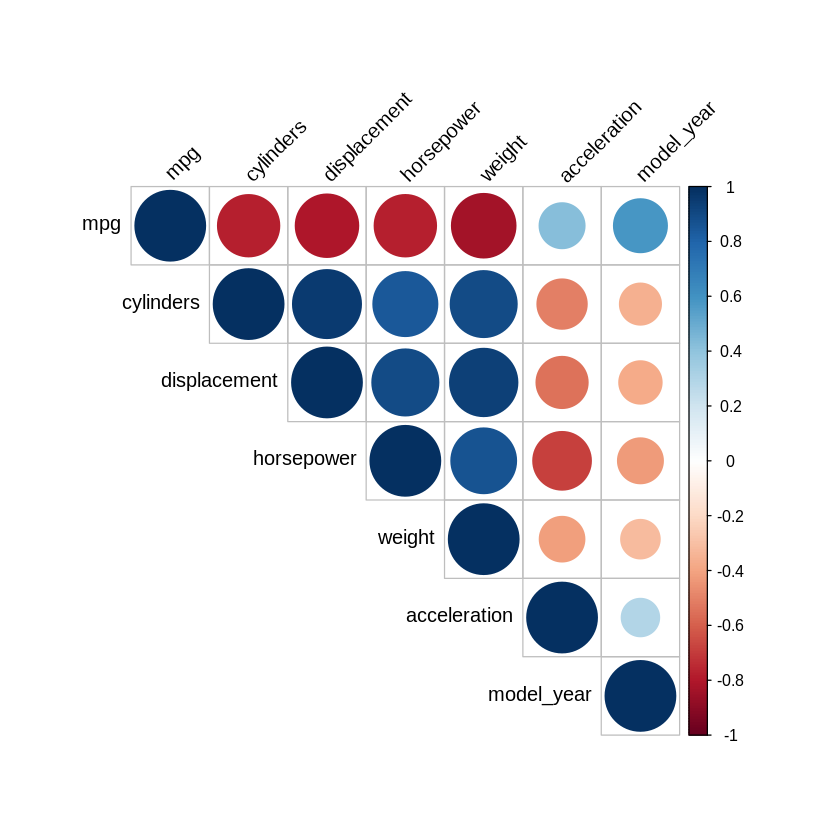

In [24]:
# Plot correlation matrix

corrplot(cor_data, method = "circle", type = "upper", tl.col = "black", tl.srt = 45)

# Train - Test split

In [26]:
set.seed(999)

#create an 80 -20 train - test split
train_index <- createDataPartition(auto_mpg$mpg,p = 0.8 , list = FALSE)

train_data <- auto_mpg[train_index,]
test_data <- auto_mpg[-train_index,]


In [28]:
# check the dimensions
cat("Training rows: ",nrow(train_data)," \nTesting rows: ", nrow(test_data))

Training rows:  319  
Testing rows:  77

# Build the Multiple linear Model

In [29]:
# Fit the model
model <- lm(mpg ~ ., data = train_data)


In [32]:
# Output the summary of the fitted model
# summary(model)

# Extract the summary of the model
model_summary <- summary(model)
print(model_summary)



Call:
lm(formula = mpg ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5299 -2.5884 -0.0644  2.2222 14.2147 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.649e+01  5.524e+00  -2.986  0.00305 ** 
cylinders    -3.446e-01  3.804e-01  -0.906  0.36576    
displacement  1.035e-02  8.347e-03   1.239  0.21612    
horsepower    8.678e-04  1.558e-02   0.056  0.95563    
weight       -7.113e-03  7.608e-04  -9.350  < 2e-16 ***
acceleration  1.159e-01  1.148e-01   1.010  0.31331    
model_year    7.781e-01  6.168e-02  12.614  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.572 on 312 degrees of freedom
Multiple R-squared:  0.8011,	Adjusted R-squared:  0.7973 
F-statistic: 209.5 on 6 and 312 DF,  p-value: < 2.2e-16



In [31]:
# Convert coefficients to a nicely formatted table
kable(model_summary$coefficients,
      caption = "Regression Model Coefficients",
      digits = 4, align = "c")



Table: Regression Model Coefficients

|             | Estimate | Std. Error | t value | Pr(>&#124;t&#124;) |
|:------------|:--------:|:----------:|:-------:|:------------------:|
|(Intercept)  | -16.4938 |   5.5240   | -2.9859 |       0.0031       |
|cylinders    | -0.3446  |   0.3804   | -0.9058 |       0.3658       |
|displacement |  0.0103  |   0.0083   | 1.2394  |       0.2161       |
|horsepower   |  0.0009  |   0.0156   | 0.0557  |       0.9556       |
|weight       | -0.0071  |   0.0008   | -9.3500 |       0.0000       |
|acceleration |  0.1159  |   0.1148   | 1.0099  |       0.3133       |
|model_year   |  0.7781  |   0.0617   | 12.6138 |       0.0000       |

# Interpreting the Model Coefficients

In [35]:
include_graphics("/content/statistical_significance_high_res.jpg")

[1] "/content/statistical_significance_high_res.jpg"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

###  Goodness-of-Fit: R-squared & Adjusted R-squared
* R-squared: The proportion of variance in mpg explained by the model.
* Adjusted R-squared: Modifies R-squared to account for the number of predictors. (Prevents overestimating performance by simply adding more variables.)

A high R-squared (e.g., 0.82) suggests the model explains 82% of the variation in mpg. An Adjusted R-squared close to R-squared means you’re not artificially inflating R-squared by adding many variables.

# Model Evaluation

In [36]:
# Predict on the test set
predictions <- predict(model, newdata = test_data)

print(predictions)


       6        8       14       21       23       24       35       38 
15.14338 10.17376 13.83057 26.95957 22.17316 22.88550 21.93891 17.65281 
      53       56       57       59       63       64       66       70 
25.75623 28.78830 27.58300 24.99287 25.56399 11.52314 12.34174 10.06652 
      71       75       94       99      104      105      110      111 
10.39807 12.53175 11.78832 20.36852 28.53370  7.89435 25.99798 25.61907 
     112      139      141      143      155      162      163      167 
25.11582 10.33291 10.43548 26.91903 19.72099 16.92165 16.89517 20.56351 
     173      184      201      202      203      205      206      207 
24.29725 26.71217 19.06741 20.23725 19.20350 30.75856 30.01632 28.90153 
     212      215      219      232      233      234      236      237 
23.23423 16.17588 29.64328 16.12361 15.61282 15.26585 26.04183 29.10581 
     246      251      253      261      262      268      271      280 
32.16234 22.08456 20.77296 24.36883 20.96867 30.473

In [38]:
# Calculate RMSE
rmse <- sqrt(mean((test_data$mpg - predictions)^2))
cat("Root Mean Squared Error (RMSE):", rmse, "\n")



Root Mean Squared Error (RMSE): 2.928425 


# Plot: Actual vs. Predicted MPG

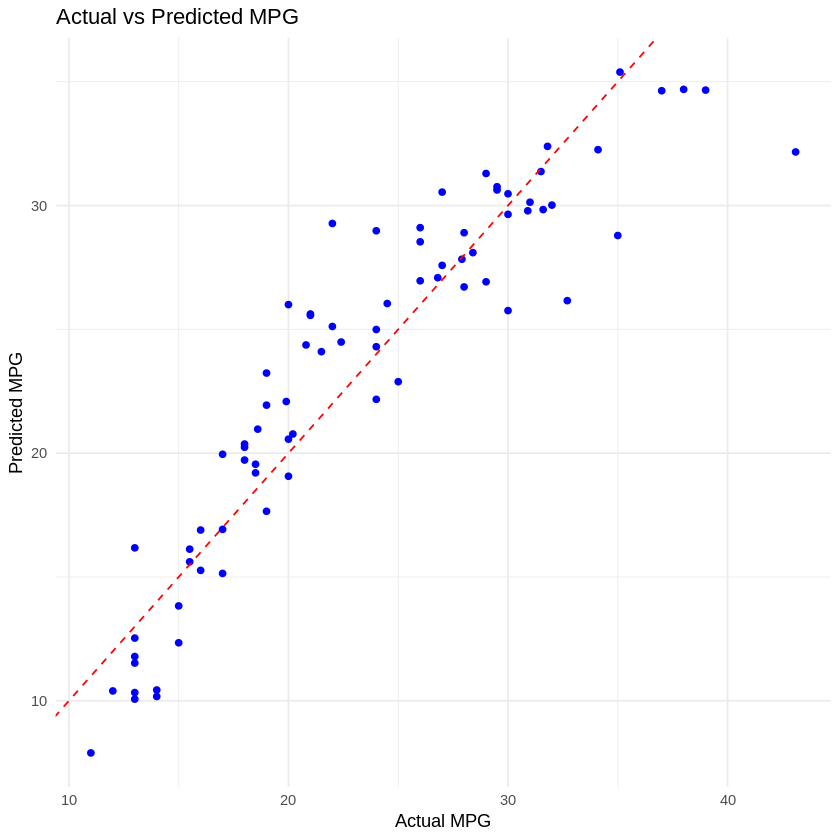

In [39]:
results_df <- data.frame(
  Actual = test_data$mpg,
  Predicted = predictions
)

ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
  labs(
    title = "Actual vs Predicted MPG",
    x = "Actual MPG",
    y = "Predicted MPG"
  ) +
  theme_minimal()

* The closer the points are to the red line, the better the predictions match the actual values.

# Conclusion

In this analysis, we:

* Fit a multiple linear regression model to predict mpg.
* Observed that our model can explain around 80%+ of the variation in mpg (based on R-squared) and gives a decent RMSE on the test set.
* By understanding both the magnitude and sign of each coefficient—and whether it is statistically significant—we gain insight into how each aspect of a car impacts its fuel efficiency.